<a href="https://colab.research.google.com/github/satoshi-ota/DeepLearning/blob/master/slow_down_dist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [ ]:
  min_acc = -1.0 #@param {type:"slider", min:-2.5, max:0.0, step:0.1}
  min_jerk = -0.3 #@param {type:"slider", min:-1.5, max:0.0, step:0.1}
  ego_acc = 0.0 #@param {type:"slider", min:-1.0, max:1.0, step:0.1}
  ego_vel_kmph = 20 #@param {type:"slider", min:5, max:20, step:1}
  obs_vel_kmph = 10 #@param {type:"slider", min:-10.0, max:10.0, step:1.0}
  slow_down_vel_kmph = 5 #@param {type:"slider", min:0.0, max:20.0, step:1.0}
  foward_margin = 3 #@param {type:"slider", min:0.0, max:10.0, step:1.0}

In [ ]:
ego_vel = ego_vel_kmph / 3.6
obs_vel = obs_vel_kmph / 3.6
#ego_vel = ego_vel - obs_vel
slow_down_vel = slow_down_vel_kmph / 3.6

t_dec = (min_acc - ego_acc) / min_jerk
t_acc = (0.0 - min_acc) / math.fabs(min_jerk)
t_min = ((slow_down_vel - ego_vel) - ego_acc * t_dec - 0.5 * min_jerk * t_dec * t_dec - 0.5 * min_acc * t_acc) / min_acc

print(t_dec, t_acc, t_min)

3.3333333333333335 3.3333333333333335 0.8333333333333324


最大減速度：-1.0 [m/ss]
減速距離：26.041666666666668 [m]
減速時間：7.5 [s]
障害物初期位置：8.208333333333336 [s]


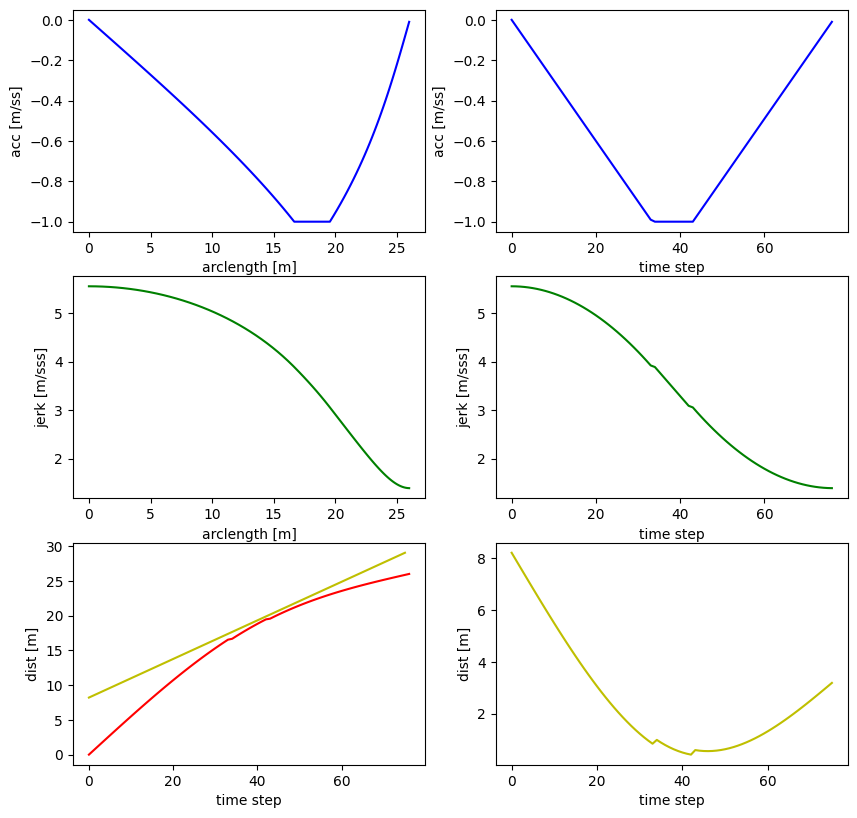

In [ ]:
if t_min > 0:
  a_arr = []
  v_arr = []
  x_arr = []
  x_obs_arr = []
  x_delta = []

  a1 = ego_acc + min_jerk * t_dec
  v1 = ego_vel + ego_acc * t_dec + 0.5 * min_jerk * t_dec * t_dec
  x1 = ego_vel * t_dec + 0.5 * ego_acc * t_dec * t_dec + (1.0 / 6.0) * min_jerk * t_dec * t_dec * t_dec

  t = 0.0
  while t_dec > t:
    a_arr.append(ego_acc + min_jerk * t)
    v_arr.append(ego_vel + ego_acc * t + 0.5 * min_jerk * t * t)
    x_arr.append(ego_vel * t + 0.5 * ego_acc * t * t + (1.0 / 6.0) * min_jerk * t * t * t)
    t += 0.1

  a2 = a1
  v2 = v1 + a1 * t_min
  x2 = x1 + v1 * t_min + 0.5 * a1 * t_min * t_min

  t = 0.0
  while t_min > t:
    a_arr.append(a2)
    v_arr.append(v1 + a1 * t)
    x_arr.append(x1 + v1 * t + 0.5 * a1 * t * t)
    t += 0.1

  a3 = a2 + math.fabs(min_jerk) * t_acc
  v3 = v2 + a2 * t_acc + 0.5 * math.fabs(min_jerk) * t_acc * t_acc
  x3 = x2 + v2 * t_acc + 0.5 * a2 * t_acc * t_acc + (1.0 / 6.0) * math.fabs(min_jerk) * t_acc * t_acc * t_acc

  t = 0.0
  while t_acc >= t:
    a_arr.append(a2 + math.fabs(min_jerk) * t)
    v_arr.append(v2 + a2 * t + 0.5 * math.fabs(min_jerk) * t * t)
    x_arr.append(x2 + v2 * t + 0.5 * a2 * t * t + (1.0 / 6.0) * math.fabs(min_jerk) * t * t * t)
    t += 0.1

  t_total = t_dec + t_min + t_acc
  x_obs = (x3 + foward_margin) - obs_vel * t_total

  t = 0.0
  while t_total >= t:
    x_obs_arr.append(x_obs + obs_vel * t)
    t += 0.1

  for index in range(len(x_obs_arr)):
    x_delta.append(x_obs_arr[index] - x_arr[index])

  print('最大減速度：{0} [m/ss]'.format(a1))
  print('減速距離：{0} [m]'.format(x3))
  print('減速時間：{0} [s]'.format(t_total)) 
  print('障害物初期位置：{0} [s]'.format(x_obs)) 

elif 0.5 * (0.0 - ego_acc) / math.fabs(min_jerk) * ego_acc > slow_down_vel - ego_vel:
  a_arr = []
  v_arr = []
  x_arr = []
  x_obs_arr = []
  x_delta = []

  a1_square = (slow_down_vel - ego_vel - 0.5 * (0.0 - ego_acc) / min_jerk * ego_acc) * (2.0 * math.fabs(min_jerk) * min_jerk / (math.fabs(min_jerk) - min_jerk));
  a1 = -math.sqrt(a1_square)
  t1 = (a1 - ego_acc) / min_jerk
  v1 = ego_vel + ego_acc * t1 + 0.5 * min_jerk * t1 * t1
  x1 = ego_vel * t1 + 0.5 * ego_acc * t1 * t1 + (1.0 / 6.0) * min_jerk * t1 * t1 * t1

  t = 0.0
  while t1 >= t:
    a_arr.append(ego_acc + min_jerk * t)
    v_arr.append(ego_vel + ego_acc * t + 0.5 * min_jerk * t * t)
    x_arr.append(ego_vel * t + 0.5 * ego_acc * t * t + (1.0 / 6.0) * min_jerk * t * t * t)
    t += 0.1

  t2 = (0.0 - a1) / math.fabs(min_jerk)
  a2 = a1 + math.fabs(min_jerk) * t2
  v2 = v1 + a1 * t2 + 0.5 * math.fabs(min_jerk) * t2 * t2
  x2 = x1 + v1 * t2 + 0.5 * a1 * t2 * t2 + (1.0 / 6.0) * math.fabs(min_jerk) * t2 * t2 * t2

  t = 0.0
  while t2 >= t:
    a_arr.append(a1 + math.fabs(min_jerk) * t)
    v_arr.append(v1 + a1 * t + 0.5 * math.fabs(min_jerk) * t * t)
    x_arr.append(x1 + v1 * t + 0.5 * a1 * t * t + (1.0 / 6.0) * math.fabs(min_jerk) * t * t * t)
    t += 0.1

  t_total = t1 + t2
  x_obs = (x2 + foward_margin) - obs_vel * t_total

  t = 0.0
  while t_total >= t:
    x_obs_arr.append(x_obs + obs_vel * t)
    t += 0.1

  for index in range(len(x_obs_arr)):
    x_delta.append(x_obs_arr[index] - x_arr[index])

  print('最大減速度：{0} [m/ss]'.format(a1))
  print('減速距離：{0} [m]'.format(x2))
  print('減速時間：{0} [s]'.format(t_total)) 
  print('障害物初期位置：{0} [s]'.format(x_obs)) 

fig = plt.figure(figsize=(10,10),dpi=100)
ax1 = fig.add_subplot(3, 2, 1)
ax2 = fig.add_subplot(3, 2, 2)
ax3 = fig.add_subplot(3, 2, 3)
ax4 = fig.add_subplot(3, 2, 4)
ax5 = fig.add_subplot(3, 2, 5)
ax6 = fig.add_subplot(3, 2, 6)

ax1.plot(x_arr,a_arr,"-b")
ax1.set_xlabel('arclength [m]')
ax1.set_ylabel('acc [m/ss]')
ax2.plot(a_arr,"-b")
ax2.set_xlabel('time step')
ax2.set_ylabel('acc [m/ss]')
ax3.plot(x_arr,v_arr,"-g")
ax3.set_xlabel('arclength [m]')
ax3.set_ylabel('jerk [m/sss]')
ax4.plot(v_arr,"-g")
ax4.set_xlabel('time step')
ax4.set_ylabel('jerk [m/sss]')
ax5.plot(x_arr,"-r")
ax5.set_xlabel('time step')
ax5.set_ylabel('dist [m]')
ax5.plot(x_obs_arr,"-y")
ax5.set_xlabel('time step')
ax5.set_ylabel('dist [m]')
ax6.plot(x_delta,"-y")
ax6.set_xlabel('time step')
ax6.set_ylabel('dist [m]')
plt.show()